In [2]:
# Step 1: Import the relevant python libraries for the analysis
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import pylab as pl
import math

In [3]:
# Step 2: Load the dataset
materna = pd.read_csv('mortalidad_materna.csv')
#materna.info()

### Explore the Data and Create Clean Sub-Dataframe for Analysis

In [4]:
# 1. Combine patient birthdate information into one column
birth = DataFrame(materna, columns=['Año de nacimiento', 'Mes de nacimiento', 'Día de nacimiento'])
birth = materna['Año de nacimiento'].map(str) + '-' + materna['Mes de nacimiento'].map(str) + '-' + materna['Mes de nacimiento'].map(str)
print(birth.sort_values(ascending=True).head(2))
len(birth)

13088    0-0-0
12833    0-0-0
dtype: object


18163

In [5]:
# Combine patient date of death information into one column
death = DataFrame(materna, columns=['Año de la defunción', 'Mes de la defunción', 'Día de la defunción'])
death = materna['Año de la defunción'].map(str) + '-' + materna['Mes de la defunción'].map(str) + '-' + materna['Mes de la defunción'].map(str)
print(death.sort_values(ascending=True).head(2))
len(death)

17886       0-0-0
17516    1914-3-3
dtype: object


18163

In [6]:
# Create variable to store age fulfilled by patient and mortality reason
last_age = materna['Edad cumplida']
mortality_reason = materna['Razón de mortalidad materna']

# Create variables:

#providence information 
providence_code = materna['Entidad de residencia']
providence_key = materna['Descripción de entidad de residencia']

#local community info
local_size = materna['Tamaño de localidad']
population = materna['Descripción del tamaño de localidad']

#health information
health_code = materna['Derechohabiencia']
health_key = materna['Descripción de la derechohabiencia']

In [7]:
# Create a sub-dataframe to hold all date- information 
dates = pd.concat([birth, death, last_age, mortality_reason, providence_code, providence_key, local_size, population, health_code, health_key], axis=1)
dates.columns = ['Date of Birth', 'Date of Death', 'Age at Death', 'Reason for Mortality', 'Residence Code', 'Residence Name', 'Local Community Size', 'Population', 'Health Status Code', 'Health Status Name']
dates.head(2)

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population,Health Status Code,Health Status Name
0,1972-7-7,2002-3-3,29,1,29,Tlaxcala,10,40000 a 49999 habitantes,3,ISSSTE
1,1967-4-4,2003-5-5,36,1,29,Tlaxcala,10,40000 a 49999 habitantes,1,NINGUNA


### Check for null or errors in Data

In [8]:
# Order dates dataframe to list in ascending order of approx. age at death
dates = dates.sort_values(by=['Age at Death'],ascending=True)
dates.head()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population,Health Status Code,Health Status Name
9598,1998-7-7,2009-7-7,11,1,7,Chiapas,1,1 a 999 habitantes,1,NINGUNA
6407,1996-1-1,2008-12-12,12,1,30,Veracruz de Ignacio de la Llave,11,50000 a 74999 habitantes,7,SEGURO POPULAR
9084,2001-12-12,2014-5-5,12,1,27,Tabasco,14,250000 a 499999 habitantes,7,SEGURO POPULAR
10883,1983-11-11,2002-6-6,12,1,15,México,4,2500 a 4999 habitantes,1,NINGUNA
1266,1993-0-0,2005-1-1,12,1,12,Guerrero,4,2500 a 4999 habitantes,1,NINGUNA


In [9]:
# Reset Index 
dates = dates.reset_index(drop=True)
dates.head()
dates.tail()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population,Health Status Code,Health Status Name
18158,0-0-0,1975-2-2,998,0,25,Sinaloa,1,1 a 999 habitantes,0,DERECHOHABIENCIA NO ESPECIFICADA
18159,0-0-0,2006-9-9,998,1,27,Tabasco,12,75000 a 99999 habitantes,0,DERECHOHABIENCIA NO ESPECIFICADA
18160,0-0-0,2000-6-6,998,0,16,Michoacán de Ocampo,0,No Especificado.,0,DERECHOHABIENCIA NO ESPECIFICADA
18161,0-0-0,0-0-0,998,0,0,No especificado,0,No Especificado.,0,DERECHOHABIENCIA NO ESPECIFICADA
18162,0-0-0,2002-4-4,998,1,8,Chihuahua,1,1 a 999 habitantes,1,NINGUNA


In [10]:
# 7: Remove rows with NaN / '0-0-0' values in Date of Birth
dates = dates[dates['Date of Birth'] != '0-0-0']
dates.tail()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population,Health Status Code,Health Status Name
18134,1933-12-12,2015-8-8,81,0,9,Distrito Federal,15,500000 a 999999 habitantes,2,IMSS
18135,1933-11-11,2015-12-12,82,0,15,México,14,250000 a 499999 habitantes,2,IMSS
18136,1933-8-8,2015-9-9,82,0,24,San Luis Potosí,15,500000 a 999999 habitantes,2,IMSS
18137,1930-1-1,2016-2-2,86,0,14,Jalisco,15,500000 a 999999 habitantes,2,IMSS
18138,1930-8-8,2017-1-1,86,0,30,Veracruz de Ignacio de la Llave,2,1000 a 1999 habitantes,6,SECRETARIA DE MARINA


## Check if all values make sense
- What does the '0' for Reason for Mortality Mean?

In [11]:
# Create a variable for the description of Reason for Mortality Description
mortality_description = materna['Descripción de la razón de mortalidad materna']

# Create a sub-dataframe to show interaction of Reason for Mortality Code and Description
mortality = pd.concat([mortality_reason, mortality_description], axis=1)
mortality.columns = ['Reason Mortality Code', 'Reason Mortality Description']
print(mortality.head(2), mortality.tail(2))

   Reason Mortality Code                       Reason Mortality Description
0                      1  Muertes Maternas para la razón de Mortalidad M...
1                      1  Muertes Maternas para la razón de Mortalidad M...        Reason Mortality Code  \
18161                      0   
18162                      0   

                            Reason Mortality Description  
18161  Muertes Maternas excluidas para la razón de Mo...  
18162  Muertes Maternas excluidas para la razón de Mo...  


*Conclusion*: Based off of the sub-dataset, it is clear the a '1' refers to recorded deaths associated with pregnancy whereas a '0' refers to recorded deaths that are *not* associated with pregnancy. Since the purpose of this analysis is to determine the mean age of maternal death, all rows with the '0' value should be removed from the dates sub-dataet.

In [12]:
# Remove rows with 0 values in Reason for Mortality
dates = dates[dates['Reason for Mortality'] != 0 ]
dates.tail()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population,Health Status Code,Health Status Name
18113,1960-3-3,2010-10-10,50,1,12,Guerrero,1,1 a 999 habitantes,7,SEGURO POPULAR
18116,1960-1-1,2011-10-10,51,1,12,Guerrero,1,1 a 999 habitantes,1,NINGUNA
18121,1963-12-12,2017-10-10,53,1,15,México,6,10000 a 14999 habitantes,1,NINGUNA
18123,1961-8-8,2015-5-5,53,1,7,Chiapas,2,1000 a 1999 habitantes,7,SEGURO POPULAR
18125,1942-12-12,2002-12-12,54,1,20,Oaxaca,3,2000 a 2499 habitantes,1,NINGUNA


In [13]:
# Analyze shape of cleaned data
dates.describe()

,Age at Death,Reason for Mortality,Residence Code,Local Community Size,Health Status Code
count,16636.000000,16636.0,16636.000000,16636.000000,16636.000000
mean,28.356756,1.0,16.279574,7.810050,3.108680
std,7.323171,0.0,7.850170,5.912597,2.799926
min,11.000000,1.0,1.000000,0.000000,0.000000
25%,22.000000,1.0,10.000000,2.000000,1.000000
50%,28.000000,1.0,15.000000,6.000000,2.000000
75%,34.000000,1.0,21.000000,14.000000,7.000000
max,54.000000,1.0,34.000000,17.000000,10.000000


## Question 1: What is the Average Age of Maternal Death within the dataset? How does this relate to the actual Population Average Age of Maternal Death?

### Record the Mean Age of Maternal Death within a Variable and Plot Age Distribution

In [14]:
# Create variable for maternal death
age_death = dates['Age at Death']

# Determine sample size for maternal death 
sample_size = len(age_death)
sample_size

16636

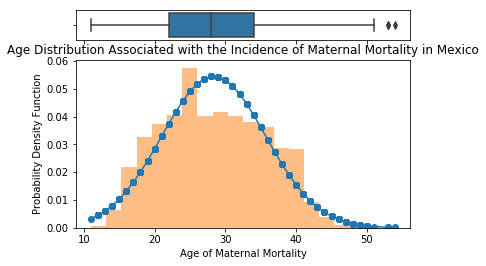

'The sample(n=16636) population mean age of maternal death is 28.36 years old with a standard deviation of 7.32.'

In [15]:
# Create a figure with two plots
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for maternal death
sns.boxplot(age_death, ax=boxplot)

# Remove x-axis label from boxplot
boxplot.set(xlabel='')

# Add histogram and normal curve for maternal death
fit = stats.norm.pdf(age_death, np.mean(age_death), np.std(age_death))
pl.plot(age_death, fit, '-o')
pl.hist(age_death, density=True, alpha=0.5, bins=20)

# Label axis 
pl.xlabel('Age of Maternal Mortality')
pl.ylabel('Probability Density Function')
pl.title('Age Distribution Associated with the Incidence of Maternal Mortality in Mexico')

# Show plot and add print mean and std sample information
plt.show()
'The sample(n=' + str(sample_size) + ') population mean age of maternal death is ' + str(round(np.mean(age_death), 2)) + ' years old with a standard deviation of ' + str(round(np.std(age_death), 2)) + '.'


The distribution appears to be generally normally distributed based off of the histogram of the maternal age at time of death. Since binning bias can occur, the Cumulative Distribution Function (CDF) needs to be analyzed.

Based off of the Central Limit Theorem (CLT), the sampling distribution of the sample means approaches a normal distribution as the sample size ($n$) gets larger - regardless of what the shape of the population distribution. Under this theorem, $n>30$ is considered a large sample size. Since the current database sample size $n$ = 16636, CLT can be assumed.

### Create Empirical and Theoretical CDFs to Assess if Data is Normally Distributed

In [16]:
# Create an Empirical Cumulative Distribution Function (ECDF)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(data)+1) / len(data)

    return x, y

In [17]:
# Compute the ECDF of data
x_death, y_death = ecdf(age_death)

# Seed the random number generator:
np.random.seed(15)

# Compute the theoretical CDF 
cdf_mean = np.mean(age_death)
cdf_std = np.std(age_death)
cdf_samples = np.random.normal(cdf_mean, cdf_std, size=10000)
x_norm, y_norm = ecdf(cdf_samples)

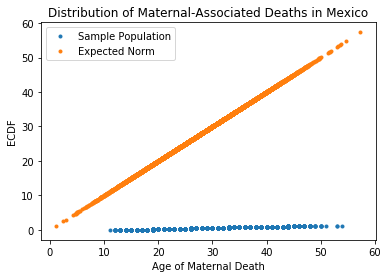

In [18]:
# Graphically visualize data

# Plot both ECDFs on same plot
fig = plt.plot(x_death, y_death, marker='.', linestyle='none')
fig = plt.plot(x_norm, x_norm, marker='.', linestyle='none')

# Label figure
fig = plt.xlabel('Age of Maternal Death')
fig = plt.ylabel('ECDF')
fig = plt.legend(('Sample Population', 'Expected Norm'))
fig = plt.title('Distribution of Maternal-Associated Deaths in Mexico')

# Save plots
plt.show()

**Conclusion**: The datat does not appear to be normally distributed. I am unclear as to what this means for my statistical significance, but further research is needed in order to determine if the distribution should or should not be normally distributed.

## Statistical Testing of Data Mean

$H$o: The mean age of death of maternal women in Mexico is equal to the mean age of death presented in the dataset ($28.35 yoa$). <br>  Empirical Mean ($μ$) − Population Mean ($μ$) = 0

$H$a: The mean age of death of maternal women in Mexico is *not* equal to the mean age of death presented in the dataset ($28.35 yoa$). <br> Empirical Mean ($μ$) − Population Mean ($μ$) ≠ 0

Significance Level: *95%* Confidence. <br> $α$ = 0.05

### Bootstrap Simulation: Compare the Sample Mean to a Statistically-Likely Population Mean

In [19]:
# Create a bootstrap replicate function for repeatability
def bootstrap_replicate_1d(data, func):
    """Create a bootstrap replicates."""
    
    # Create bootstrap sample
    boot_sample = np.random.choice(data, size=len(data))
    
    # Apply function to the computed bootstrap sample
    return func(boot_sample)


# Create a function to apply the bootstrap replicate function 'n' and return an array
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    boot_rep = np.empty(size)

    # Generate 'n' number of replicates
    for i in range(size):
        boot_rep[i] = bootstrap_replicate_1d(data, func)

    return boot_rep

**Conclusion from the Bootstrap Hypothesis Test:** The resulting population mean of maternal death approximation based on 10,000 bootstrap replicate samples was *28.3564 years of age (yoa)*, which is close to the sample mean of *28.3568 yoa* old from the dataset. Additionally, the bootstrap population mean is within the 95% Confidence Interval, *28.2443 to 28.4692 yoa* with a p-value of 0.4959, which is greater than α = 0.05. Therefore, the null hypothesis that the mean age of death of maternal women in Mexico is equal to the mean age of death presented in the dataset can be accepted. **$Ho$ is accepted**.

In [22]:
# Create variables for sample statistical information
materna_age_std = age_death.std()
materna_sample_size = len(age_death)
mean_age = dates['Age at Death'].mean()

# Create an array of the sample mean that is equal to the boostrap array length
materna_mean_arr = np.full(10000, mean_age)

print('sample size: ', materna_sample_size)
print('sample mean age of death: ', mean_age)
print('sample standard deviation: ', materna_age_std)

sample size:  16636
sample mean age of death:  28.356756431834576
sample standard deviation:  7.3231710220967


In [23]:
# Create 10000 bootstrap replicates of the mean and take the mean of the returned array
boot_tenthousand =  draw_bs_reps(age_death, np.mean, size=10000)
print('bootstrap mean age of death: ' + str(np.mean(boot_tenthousand)))

# Compute p-value
p_val = np.sum(boot_tenthousand >= materna_mean_arr) / len(boot_tenthousand)
print('p-value: {0:0.4f}'.format(p_val))

# Calculate the standard margin of error for a 95% confidence interval
conf_int_low = mean_age-(1.98*(materna_age_std/math.sqrt(materna_sample_size)))
conf_int_high = mean_age+(1.98*(materna_age_std/math.sqrt(materna_sample_size)))
print('95% Confidence Interval: [{0:0.4f}  {1:0.4f}]'.format(conf_int_low, conf_int_high))


bootstrap mean age of death: 28.35754245611926
p-value: 0.5055
95% Confidence Interval: [28.2443  28.4692]


----------------------------------------------------------------------------------------------------------------------

## Question 2: How does the Average Age and Distribution of Age of Maternal Death Change Across Mexico's States/Providences?

In [24]:
# Create a variable for residence location based off of cleaned sub-dataframe
residence = dates['Residence Name']
residence.head()

0                            Chiapas
1    Veracruz de Ignacio de la Llave
2                            Tabasco
3                             México
4                           Guerrero
Name: Residence Name, dtype: object

Text(0.5,1,'Incidence of Maternal Mortality in Each Providence of Mexico')

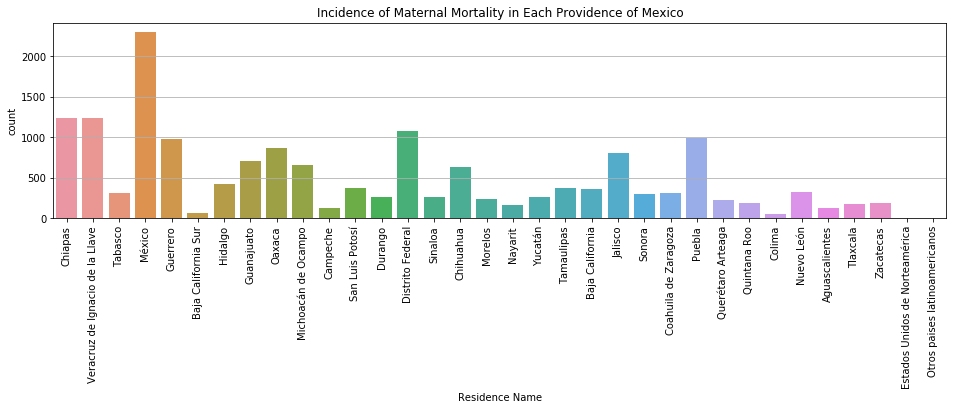

In [25]:
# Create a bar graph to show distribution of incidences of maternal death by region
fig, ax = plt.subplots(figsize=(16, 4))
plt.xticks(rotation='vertical')
plt.grid(True)
fig.subplots_adjust(bottom=0.2)
sns.countplot(residence)

# Label axis 
pl.title('Incidence of Maternal Mortality in Each Providence of Mexico')

*Preliminary Observation*: It appears that certain regions have the incidence of maternal death more prevenantly than others (ie. Mexico Region has more than Ostros paises latinomericas). Further analysis needs to be performed in order to assess the cause of these differences.

In [26]:
# Create a sub-dataframe with residence name and code (unique)

# Var for residence name 
residence_uniq = np.unique(residence)

# Var for residence code
residence_code = np.unique(dates['Residence Code'])

# Create the sub-dateframe for region
res_dataset = pd.DataFrame(residence_uniq, index=residence_code)
res_dataset = res_dataset.rename(columns={0:'Region'})
res_dataset.head()

,Region
1,Aguascalientes
2,Baja California
3,Baja California Sur
4,Campeche
5,Chiapas


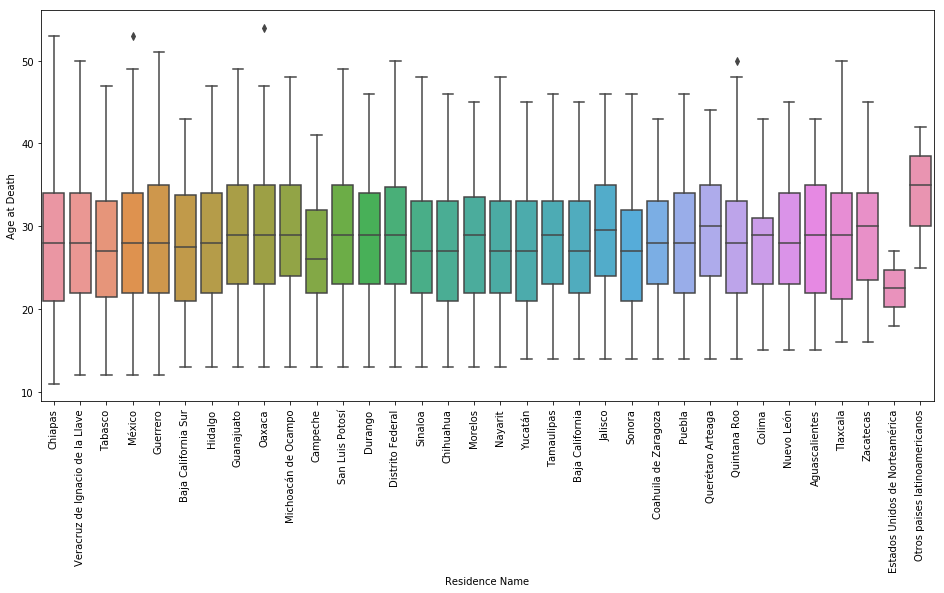

In [27]:
# Create a boxplot to show the distribution of each region compared to its mean
fig, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='vertical')
fig.subplots_adjust(bottom=0.2)
sns.boxplot(x=residence, y=age_death, data=dates)

*Preliminary Observation*: It appears that some regions experience a larger age variation in maternal deaths. Is this due to the size of the region? Or possibly the economic status of the region?

In [28]:
# Calculate the mean age per region - This section has test trials per entry to help formulate an iteration function

mean_death_list_trial = []

aguas = dates[dates['Residence Code'] == 1 ]
aguas = aguas[['Residence Code', 'Age at Death']]
aguas_mean = aguas['Age at Death'].mean()
aguas_mean = '{0:0.2f}'.format(aguas_mean)
print(aguas_mean)

mean_death_list_trial.append(aguas_mean)
print(mean_death_list_trial)

baja = dates[dates['Residence Code'] == 2 ]
baja = baja[['Residence Code', 'Age at Death']]
baja_mean = baja['Age at Death'].mean()
baja_mean = '{0:0.2f}'.format(baja_mean)
print(baja_mean)

mean_death_list_trial.append(baja_mean)
print(mean_death_list_trial)

28.36
['28.36']
27.15
['28.36', '27.15']


In [42]:
# Create an empty list to store mean age of maternal death per region
region_list = []

# Create an iteration function to calculate the mean age of maternal death per region
for i in dates['Residence Code'].sort_values().unique():
    """Calculate Mean Age per Region"""
    
    #select one region
    sub_df = dates[dates['Residence Code'] == (i - 1)]
    
    #calculate mean of region
    mean = sub_df['Age at Death'].mean()
    
    # append mean to region list
    region_list.append(round(mean, 2)) 

In [43]:
# Convert the list to a Series and add as new column to res_dataset
res_dataset['$μ$ Age Maternal Death'] = pd.Series(region_list)
res_dataset

,Region,$μ$ Age Maternal Death
1,Aguascalientes,28.36
2,Baja California,27.15
3,Baja California Sur,27.56
4,Campeche,26.87
5,Chiapas,28.02
6,Chihuahua,27.59
7,Coahuila de Zaragoza,28.24
8,Colima,26.98
9,Distrito Federal,28.84
10,Durango,28.65


*Preliminary Conclusion*: Since region 'Zacatecas' has a NaN value for mean age of maternal death, the contents of 'Zacatecas' need to be adjusted from NaN to the actual mean of the data for the res_dataset.

#### Clean Data by Replacing NaN/Null values with the Correct Data

In [46]:
# Calculate the mean Age of Death for region 'Zacatecas'
zaca = dates[dates['Residence Code'] == 34 ]
zaca = zaca['Age at Death']
zaca_mean = zaca.mean()
zaca_mean

# Change contents of res_dataset NaN to calculated mean
res_dataset = res_dataset.fillna(zaca_mean)
res_dataset.tail()

,Region,$μ$ Age Maternal Death
30,Tamaulipas,27.94
31,Tlaxcala,27.50
32,Veracruz de Ignacio de la Llave,29.23
33,Yucatán,22.50
34,Zacatecas,34.00


Text(0.5,1,'Mean Age Maternal Mortality in Each Providence of Mexico')

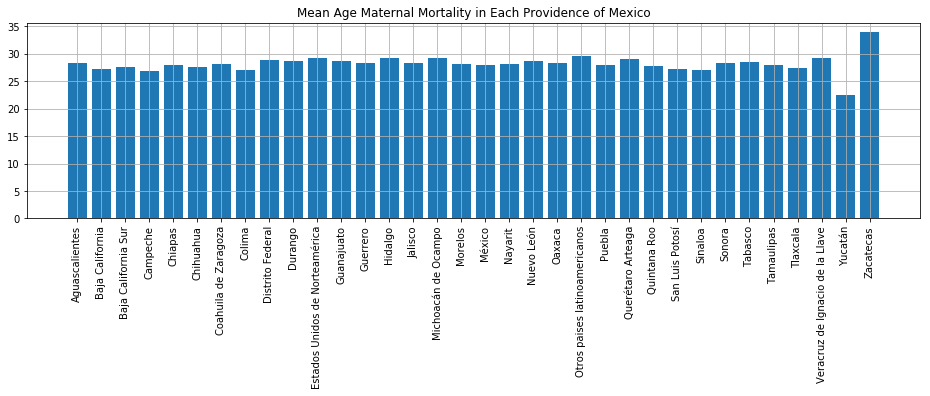

In [47]:
# Create a bar graph to show mean age maternal death by region
fig, ax = plt.subplots(figsize=(16, 4))
plt.xticks(rotation='vertical')
plt.grid(True)
fig.subplots_adjust(bottom=0.2)
plt.bar(res_dataset['Region'], res_dataset['$μ$ Age Maternal Death'])

# Label axis 
pl.title('Mean Age Maternal Mortality in Each Providence of Mexico')

### Additional Question: How does Local Community Size Relate to Mean Age of Maternal Death?

In [48]:
dates.head()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality,Residence Code,Residence Name,Local Community Size,Population,Health Status Code,Health Status Name
0,1998-7-7,2009-7-7,11,1,7,Chiapas,1,1 a 999 habitantes,1,NINGUNA
1,1996-1-1,2008-12-12,12,1,30,Veracruz de Ignacio de la Llave,11,50000 a 74999 habitantes,7,SEGURO POPULAR
2,2001-12-12,2014-5-5,12,1,27,Tabasco,14,250000 a 499999 habitantes,7,SEGURO POPULAR
3,1983-11-11,2002-6-6,12,1,15,México,4,2500 a 4999 habitantes,1,NINGUNA
4,1993-0-0,2005-1-1,12,1,12,Guerrero,4,2500 a 4999 habitantes,1,NINGUNA


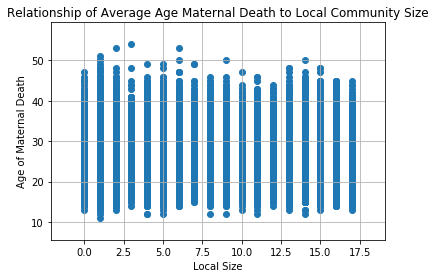

In [49]:
# Create variables for local size and size description based off of cleaned dates
localsize_dates = dates['Local Community Size']
population_dates = dates['Population']

# Create a figure with a joint plot of local size and age death:
fig = plt.scatter(localsize_dates, age_death, norm=True)

# Add a little room around the margins:
plt.margins(0.125)

# Label axes and add title:
plt.xlabel('Local Size')
plt.ylabel('Age of Maternal Death')
plt.title('Relationship of Average Age Maternal Death to Local Community Size')
#plt.legend(handles=[dates['Population']])

# Display the plots
plt.grid(True)
plt.show()

*Preliminary Analysis*: It appears that local size has no effect on Age of Maternal death since it appears that both large and small regions have similarly large ranges of maternal death.

### Additional Question 2: How does Local Community Size Relate to Mean Age of Maternal Death?